# **import the library**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **import the dataset**

In [ ]:
data = pd.read_csv('breast-cancer.csv')

data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Table Analysis**

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.describe(include = ["object"])

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.groupby(['diagnosis']).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
data.groupby(['diagnosis']).min()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,8913,6.981,9.71,43.79,143.5,0.05263,0.01938,0.00000,0.00000,0.1060,0.05185,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0.00000,0.000000,0.009539,0.000895,7.93,12.02,50.41,185.2,0.07117,0.02729,0.00000,0.00000,0.1566,0.05521
M,8670,10.950,10.38,71.90,361.6,0.07371,0.04605,0.02398,0.02031,0.1308,0.04996,0.1938,0.3621,1.334,13.990,0.002667,0.008422,0.01101,0.005174,0.007882,0.001087,12.84,16.67,85.10,508.1,0.08822,0.05131,0.02398,0.02899,0.1565,0.05504


In [ ]:
data[data['diagnosis']=='B'].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.22038,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,0.112570,0.58918,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709,0.006999,0.002938,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,0.111500,0.36020,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,0.207300,0.79590,1.445000,15.260000,0.005212,0.011320,0.010990,0.006433,0.015600,0.002074,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,0.257500,1.10800,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061,0.019090,0.002808,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,0.341600,1.49200,2.388000,25.030000,0.008534,0.025890,0.030560,0.011870,0.024060,0.004174,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,0.881100,4.88500,5.118000,77.110000,0.021770,0.106400,0.396000,0.052790,0.061460,0.029840,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [ ]:
data[data['diagnosis']=='M'].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,0.345039,0.483178,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517,0.010065,0.002041,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,0.193800,0.362100,1.334000,13.990000,0.002667,0.008422,0.011010,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,0.390375,0.892825,2.715500,35.762500,0.005085,0.019662,0.026998,0.011415,0.014615,0.002688,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,0.547200,1.102500,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205,0.017700,0.003739,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,0.757300,1.429250,5.206250,94.000000,0.007971,0.038910,0.050443,0.017497,0.022132,0.004892,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900,0.078950,0.012840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


# **Visualisation Analysis**

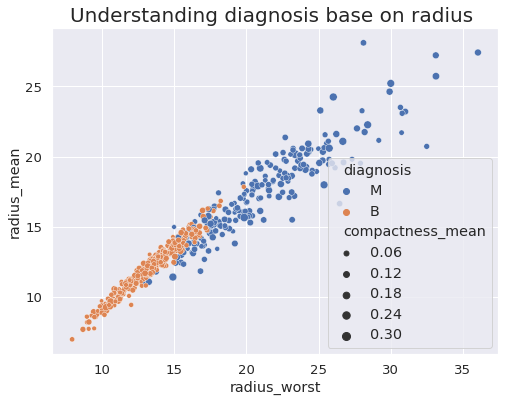

In [ ]:
plt.figure(figsize=(8 , 6))

sns.set_theme(font_scale=1.2)
_ = sns.scatterplot(data = data , x = 'radius_worst' , y = 'radius_mean' , color= 'red' , hue = 'diagnosis' , size = 'compactness_mean'  )

_ = plt.title('Understanding diagnosis base on radius ' , size = 20)

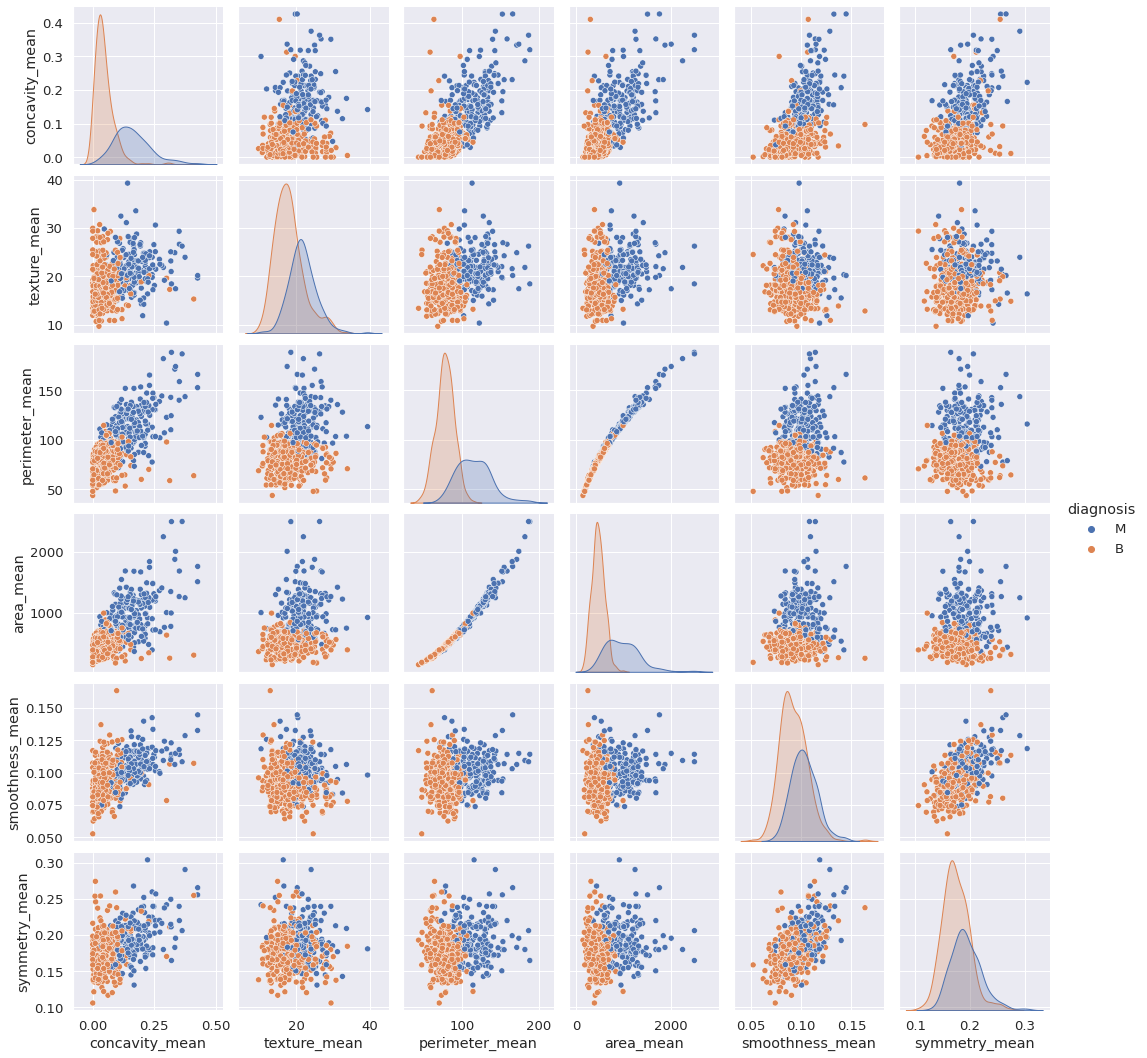

In [ ]:
sns.pairplot(data = data , hue = 'diagnosis' ,
             vars = ['concavity_mean', 'texture_mean', 'perimeter_mean',
                     'area_mean', 'smoothness_mean' , 'symmetry_mean']  )


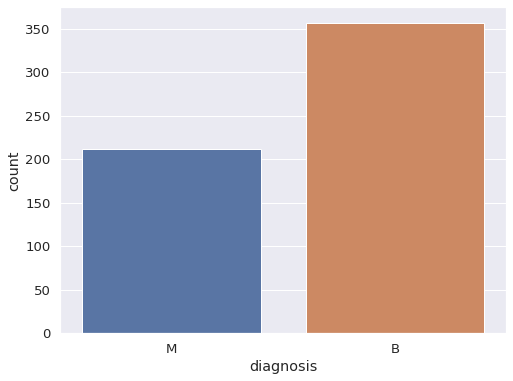

In [ ]:
plt.figure(figsize=(8 , 6))
sns.set_theme(font_scale=1.2)
_ = sns.countplot(x = 'diagnosis' , data = data)


Text(0, 0.5, 'diagnosis')

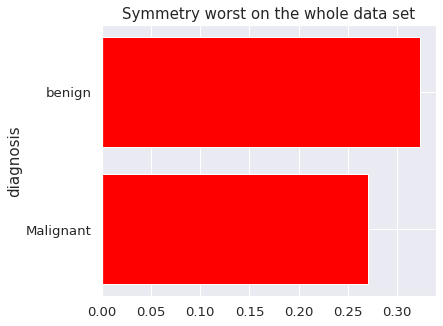

In [ ]:
plt.figure(figsize = (6 ,5))

sns.set_theme(font_scale=1.2)

ra = dict(data.groupby('diagnosis')['symmetry_worst'].mean())
plt.barh(list(ra.keys()) , list(ra.values()) , color = 'red' , tick_label = ['Malignant' , 'benign'] )


plt.title('Symmetry worst on the whole data set' , size = 15)
plt.ylabel('diagnosis' , size = 15)



<Figure size 576x432 with 0 Axes>

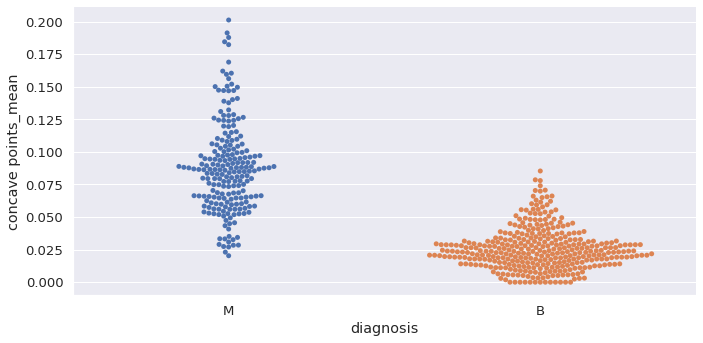

In [ ]:
plt.figure(figsize = (8 ,6))

sns.set_theme(font_scale=1.2)

sns.catplot(x = 'diagnosis' , y = 'concave points_mean' , data = data , height=5 , aspect = 2 , kind ='swarm')


<Figure size 576x432 with 0 Axes>

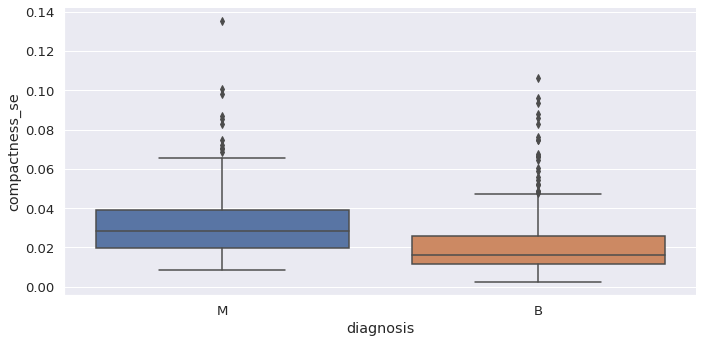

In [ ]:
plt.figure(figsize = (8 ,6))

sns.set_theme(font_scale=1.2)

sns.catplot(x = 'diagnosis' , y = 'compactness_se' , data = data , kind = 'box' , height = 5 , aspect = 2)


#**Data prepration**

##**Data preprocessing**

**handle categorical data**

In [ ]:
data.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
data1=data.drop(['id'],axis=1)
data1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data1.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data2=data1.replace({'diagnosis':'B'},0).replace({'diagnosis':'M'},1)


In [ ]:
data2.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

**handle missing value**

In [ ]:
data2.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**handle outliers**

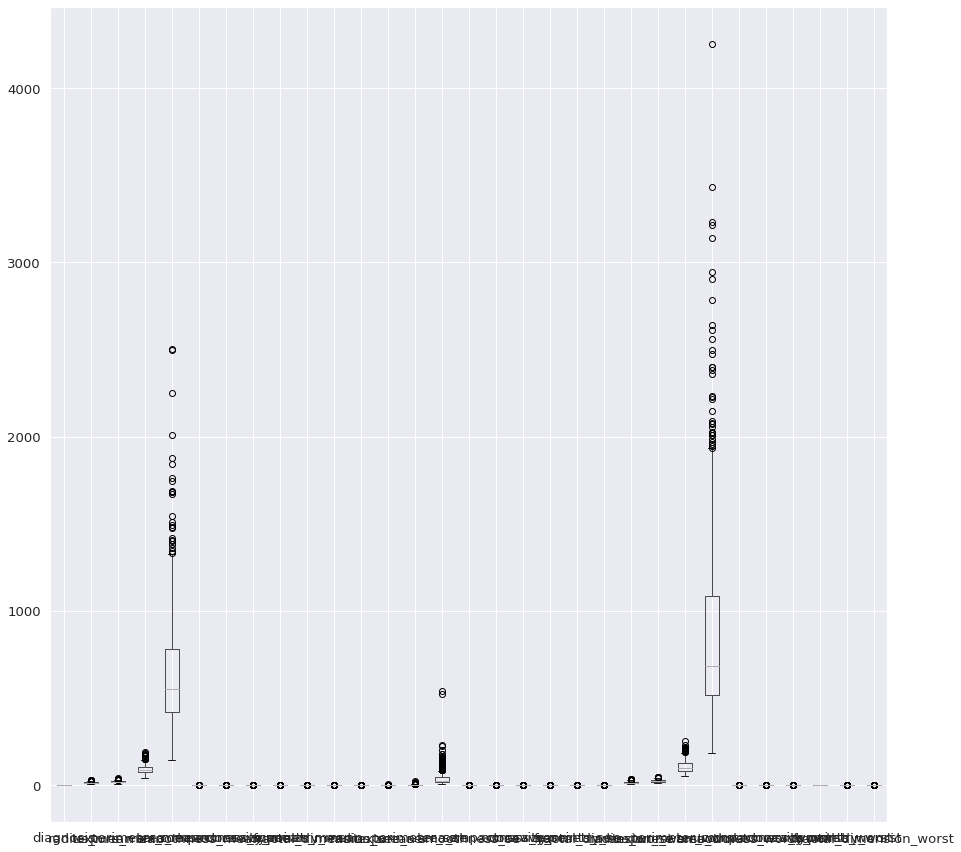

In [ ]:
plt.figure(figsize = (15 , 15))

data2.boxplot()

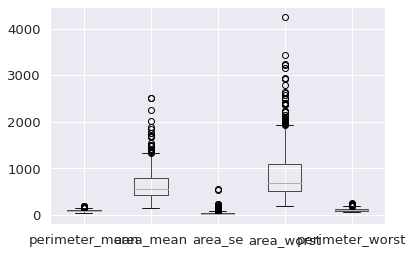

In [ ]:
data2.iloc[:,[3,4,14,-7,-8]].boxplot()

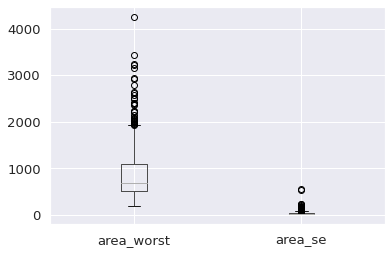

In [ ]:
data2.iloc[:,[-7,14]].boxplot()

In [ ]:
#perimeter_mean

Q1 = data2.iloc[:,3].quantile(0.25)
Q3 = data2.iloc[:,3].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

31.775000000000013 147.49499999999998


In [ ]:
data2[data2['perimeter_mean']>147.49499999999998].shape

(13, 31)

In [ ]:
data2 = data2[data2['perimeter_mean']<=147.49499999999998].reset_index().drop('index' , axis = 1)
data2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
552,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
553,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
554,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#area_mean

Q1 = data2.iloc[:,4].quantile(0.25)
Q3 = data2.iloc[:,4].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-79.06250000000017 1243.6375000000003


In [ ]:
data2[data2["area_mean"]>1326.3000000000002].shape

(12, 31)

In [ ]:
data2 = data2[data2["area_mean"]<=1326.3000000000002].reset_index().drop('index' , axis = 1)
data2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
540,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
541,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
542,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#area_se

Q1 = data2.iloc[:,14].quantile(0.25)
Q3 = data2.iloc[:,14].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)




-17.302499999999995 75.9575


In [ ]:
data2[data2['area_se']>75.9575].shape

(52, 31)

In [ ]:
data2 = data2[data2['area_se']<=75.9575].reset_index().drop('index' , axis =1)
data2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
2,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
3,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.01039,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
4,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.01448,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
488,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.8960,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
489,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
490,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
#area_worst

Q1 = data2.iloc[:,-7].quantile(0.25)
Q3 = data2.iloc[:,-7].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)

-22.074999999999875 1342.725


In [ ]:
data2[data2['area_worst']>1342.725].shape

(33, 31)

In [ ]:
data3 = data2[data2['area_worst']<=1342.725].reset_index().drop('index', axis = 1)
data3

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
1,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
2,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.01448,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
3,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.01226,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720
4,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.2210,0.4366,0.20750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.888,29.84,0.007256,0.026780,0.02071,0.01626,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
455,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,3.8960,2.041,22.81,0.007594,0.008878,0.00000,0.00000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
456,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.048440,0.07359,0.01608,0.02137,0.006142,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
457,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
#perimeter_worst

Q1 = data2.iloc[:,-8].quantile(0.25)
Q3 = data2.iloc[:,-8].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

print(LB,UB)


40.73749999999997 152.27750000000003


In [ ]:
data3[data3['perimeter_worst']>=142.7425].shape

(2, 31)

In [ ]:
#data3=data2.drop([ 23,  82, 108, 122, 164, 180, 202, 212, 236, 250, 265, 272, 339,
            #352, 368, 369, 372, 373, 393, 449, 461, 503, 521, 563, 564,0,   2,   4,  12,  18, 24,  25,  27,  30,  38,  42,  53,
             #56,  70,  77,  78,  95,  121, 138, 156, 161, 162,
            #168,  210,218, 219,  252,  258, 262,
            #265, 300, 302, 335, 337,  366,  417, 433,
            #460, 468, 492, 498,  533, 535,  565, 567,  1,  181,
             #254, 323, 373, ],axis=0).reset_index().drop("index",axis=1)
         

 **handle duplicated**

In [ ]:
data3.duplicated().sum()


0

## **feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X=data3.iloc[:,1:]
Y=data3.iloc[:,0]
mm=MinMaxScaler()
X_mm=mm.fit_transform(X)

In [ ]:
X_mm_df=pd.DataFrame(X_mm,columns=X.columns)
data4=pd.concat([X_mm_df,Y],axis=1)
data4

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.353170,0.442739,0.396085,0.235420,0.811321,1.000000,0.587634,0.716133,0.913250,1.000000,0.538710,0.175875,0.532910,0.303636,0.251453,0.543215,0.142955,0.353665,0.964754,0.287205,0.535687,0.385928,0.488557,0.337064,0.915472,0.814012,0.548642,0.953351,1.000000,0.773459,1
1,0.435118,0.248548,0.454577,0.323726,0.678613,0.569409,0.384129,0.550647,0.610220,0.551179,0.312763,0.117132,0.289453,0.303041,0.197063,0.234311,0.092727,0.215382,0.233258,0.144660,0.578665,0.312633,0.534227,0.490307,0.712739,0.482784,0.427716,0.644576,0.476932,0.454331,1
2,0.535365,0.461411,0.544016,0.421543,0.598267,0.548616,0.227994,0.407420,0.674985,0.517060,0.661992,0.224717,0.614393,0.656351,0.241085,0.210578,0.062828,0.274294,0.102483,0.156060,0.700691,0.429638,0.606815,0.627247,0.622268,0.330753,0.213898,0.576083,0.321372,0.393263,1
3,0.478877,0.502490,0.512367,0.365163,0.674099,0.657115,0.452532,0.636692,0.766488,0.504002,0.273212,0.141841,0.326923,0.260382,0.136588,0.246102,0.089722,0.232241,0.229021,0.098607,0.580200,0.498667,0.562456,0.488280,0.654626,0.497531,0.430511,0.762680,0.554416,0.341388,1
4,0.435914,0.594606,0.470988,0.322562,0.595558,0.832527,0.553311,0.581552,0.576352,0.683867,0.261010,0.273780,0.254163,0.254734,0.184791,0.525115,0.195530,0.271263,0.160841,0.317331,0.549501,0.763859,0.476258,0.463694,0.753682,1.000000,0.882588,0.818215,0.552050,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.562415,0.723651,0.557848,0.443377,0.421233,0.352412,0.108617,0.292988,0.283422,0.247473,0.354839,0.250133,0.422482,0.342430,0.188428,0.184216,0.052298,0.308013,0.216887,0.152329,0.565618,0.563699,0.501966,0.459552,0.349534,0.193178,0.105911,0.388004,0.134858,0.183860,0
455,0.335667,0.815768,0.315086,0.235323,0.197346,0.061243,0.000000,0.000000,0.000000,0.106571,0.284151,0.781427,0.254560,0.237938,0.199918,0.049764,0.000000,0.000000,0.199361,0.030340,0.306216,0.700426,0.249824,0.224180,0.141980,0.026826,0.000000,0.000000,0.000000,0.025215,0
456,0.655502,0.867635,0.698746,0.556429,0.470976,0.715711,0.620740,0.641865,0.634581,0.454086,0.208555,0.186704,0.318200,0.235560,0.098990,0.346892,0.185833,0.304603,0.227865,0.181280,0.735994,0.820096,0.789293,0.643109,0.465760,0.741634,0.934505,0.872270,0.497437,0.562676,1
457,0.765296,0.762241,0.756183,0.693450,0.288165,0.313473,0.225195,0.360926,0.314914,0.137321,0.483731,0.157974,0.528945,0.620530,0.142435,0.263301,0.119444,0.294942,0.070126,0.103547,0.848043,0.589019,0.769130,0.827282,0.282177,0.273705,0.271805,0.524991,0.128549,0.150962,1


## **feature selection**

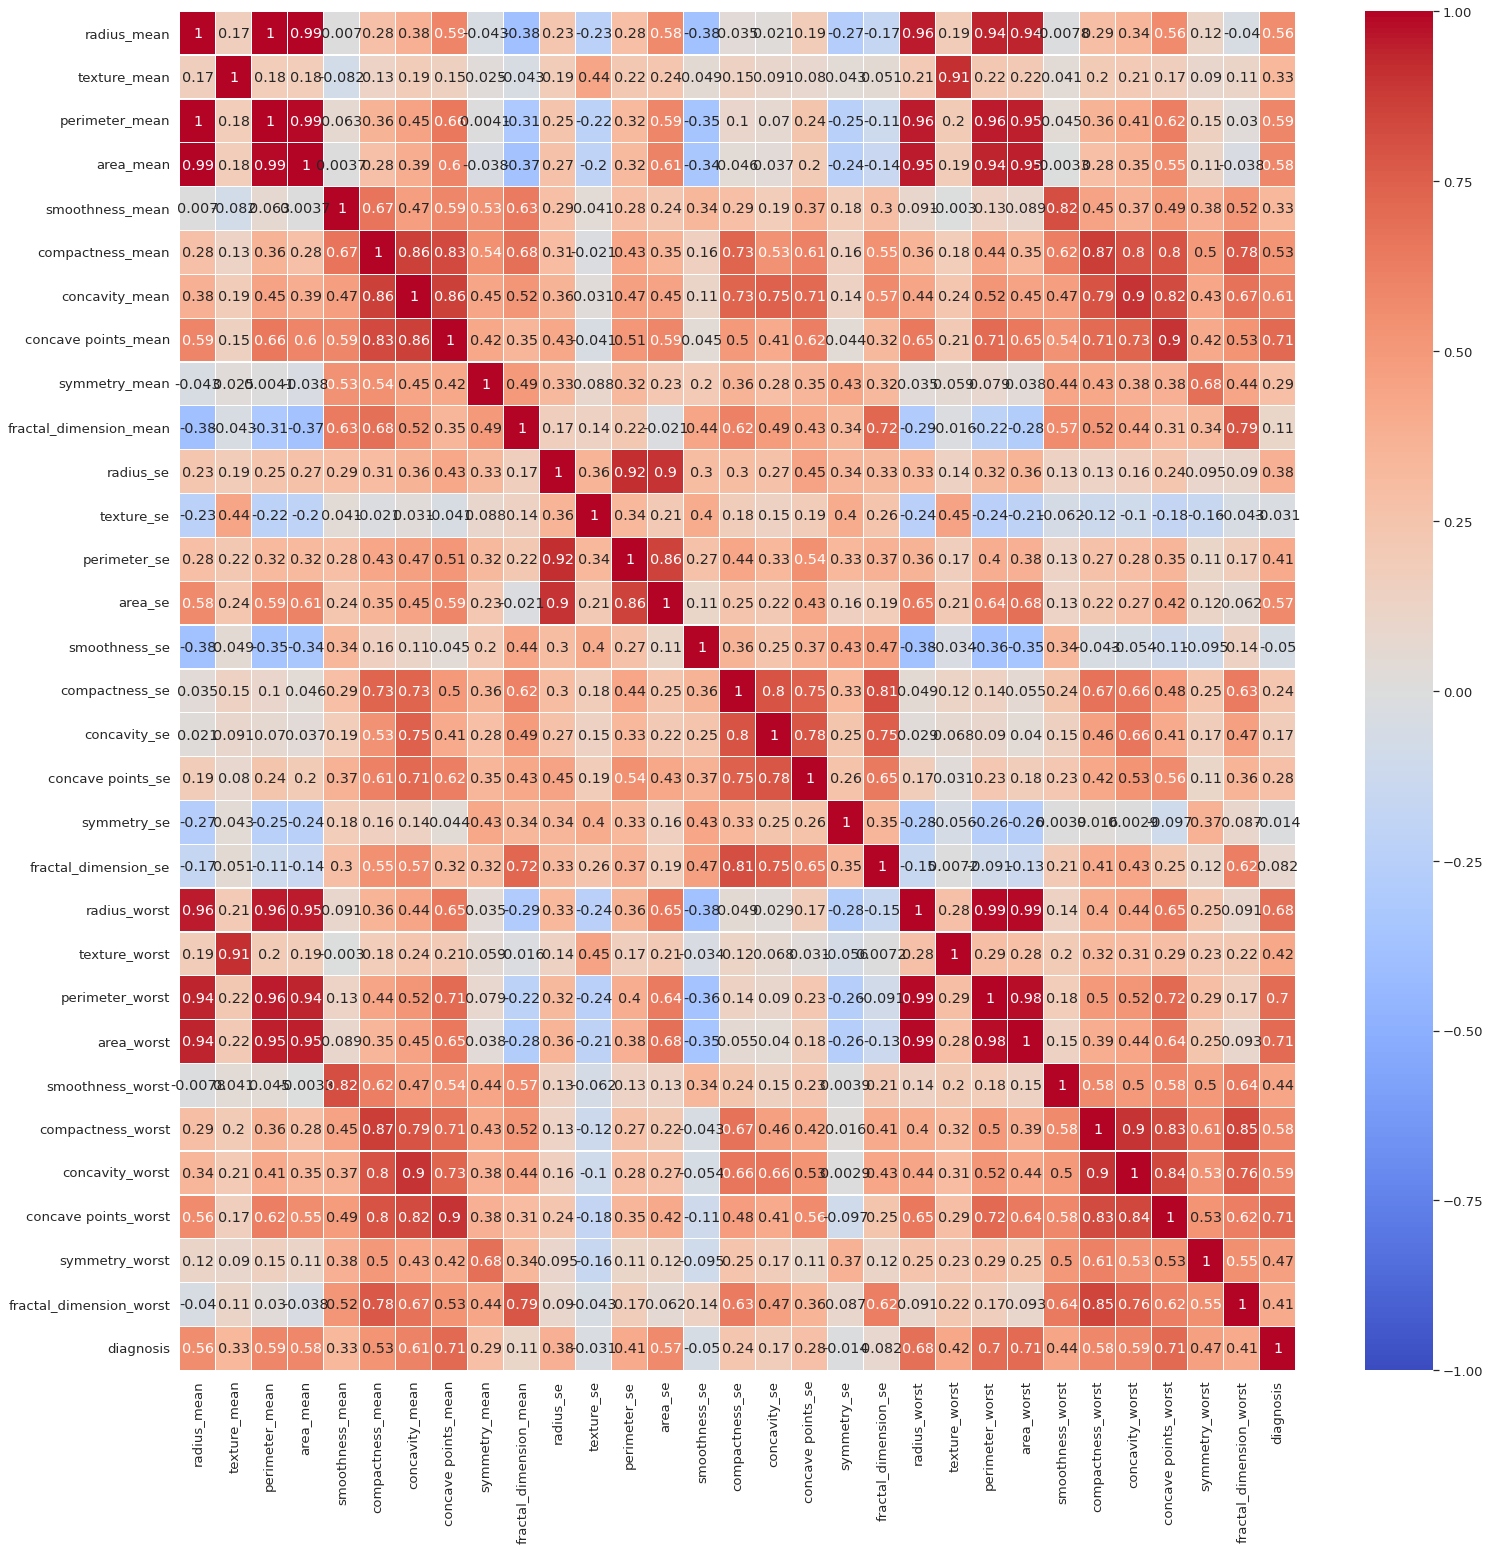

In [ ]:
plt.figure(figsize = (25  ,25))
sns.heatmap(
data4.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm",linewidths=.3)

In [ ]:

X , y = data4.iloc[: , :-1] , data4.iloc[: , -1]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X1 = data4.iloc[: , :-1]
y1 = data4.iloc[: , -1]


pd.Series(chi2(X1 , y1)[1] , index = X1.columns ).sort_values( ascending = False )

symmetry_se                9.238701e-01
texture_se                 8.480525e-01
smoothness_se              7.915033e-01
fractal_dimension_se       6.055355e-01
fractal_dimension_mean     5.110202e-01
concavity_se               2.805309e-01
concave points_se          1.491142e-01
symmetry_mean              1.444952e-01
smoothness_mean            1.407420e-01
compactness_se             9.874162e-02
texture_mean               4.533792e-02
smoothness_worst           1.962019e-02
symmetry_worst             1.823509e-02
fractal_dimension_worst    1.348306e-02
texture_worst              1.272653e-02
radius_se                  7.741344e-03
perimeter_se               4.568287e-03
radius_mean                2.665708e-03
perimeter_mean             1.283754e-03
area_mean                  4.318515e-04
compactness_mean           2.587688e-04
compactness_worst          5.247450e-05
radius_worst               2.022775e-05
area_se                    1.759237e-05
perimeter_worst            1.738162e-05


In [ ]:
X1 = X1.drop(['fractal_dimension_mean' , 'fractal_dimension_se' , 'texture_se' , 'smoothness_se' , 'symmetry_se' , 'concavity_se',
              'concave points_se' , 'symmetry_mean' , 'smoothness_mean' , 'compactness_se' ] , axis = 1)
X1

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.353170,0.442739,0.396085,0.235420,1.000000,0.587634,0.716133,0.538710,0.532910,0.303636,0.535687,0.385928,0.488557,0.337064,0.915472,0.814012,0.548642,0.953351,1.000000,0.773459
1,0.435118,0.248548,0.454577,0.323726,0.569409,0.384129,0.550647,0.312763,0.289453,0.303041,0.578665,0.312633,0.534227,0.490307,0.712739,0.482784,0.427716,0.644576,0.476932,0.454331
2,0.535365,0.461411,0.544016,0.421543,0.548616,0.227994,0.407420,0.661992,0.614393,0.656351,0.700691,0.429638,0.606815,0.627247,0.622268,0.330753,0.213898,0.576083,0.321372,0.393263
3,0.478877,0.502490,0.512367,0.365163,0.657115,0.452532,0.636692,0.273212,0.326923,0.260382,0.580200,0.498667,0.562456,0.488280,0.654626,0.497531,0.430511,0.762680,0.554416,0.341388
4,0.435914,0.594606,0.470988,0.322562,0.832527,0.553311,0.581552,0.261010,0.254163,0.254734,0.549501,0.763859,0.476258,0.463694,0.753682,1.000000,0.882588,0.818215,0.552050,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.562415,0.723651,0.557848,0.443377,0.352412,0.108617,0.292988,0.354839,0.422482,0.342430,0.565618,0.563699,0.501966,0.459552,0.349534,0.193178,0.105911,0.388004,0.134858,0.183860
455,0.335667,0.815768,0.315086,0.235323,0.061243,0.000000,0.000000,0.284151,0.254560,0.237938,0.306216,0.700426,0.249824,0.224180,0.141980,0.026826,0.000000,0.000000,0.000000,0.025215
456,0.655502,0.867635,0.698746,0.556429,0.715711,0.620740,0.641865,0.208555,0.318200,0.235560,0.735994,0.820096,0.789293,0.643109,0.465760,0.741634,0.934505,0.872270,0.497437,0.562676
457,0.765296,0.762241,0.756183,0.693450,0.313473,0.225195,0.360926,0.483731,0.528945,0.620530,0.848043,0.589019,0.769130,0.827282,0.282177,0.273705,0.271805,0.524991,0.128549,0.150962


# **spliting data into train test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X1 , y1 , test_size = 0.3 )

#**Handle Imbalance data**

In [ ]:
y_train.value_counts()

0    245
1     76
Name: diagnosis, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote , y_smote = smote.fit_resample(X_train , y_train)



In [ ]:
#X_over = data_train_over.iloc[: , :-1]
#y_over = data_train_over.iloc[: , -1]


In [ ]:
y_smote.value_counts()          #we imbalance the data only on traing set base on related paper in brest canser

0    245
1    245
Name: diagnosis, dtype: int64

In [ ]:
X_train  , X_val ,y_train ,y_val = train_test_split(X_smote , y_smote ,random_state = 42 , test_size = 0.1 )


print(X_val.shape)          #keep 10 percent of our data for validation 

(49, 20)


In [ ]:
y_train.value_counts()

0    221
1    220
Name: diagnosis, dtype: int64

# **Training the model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

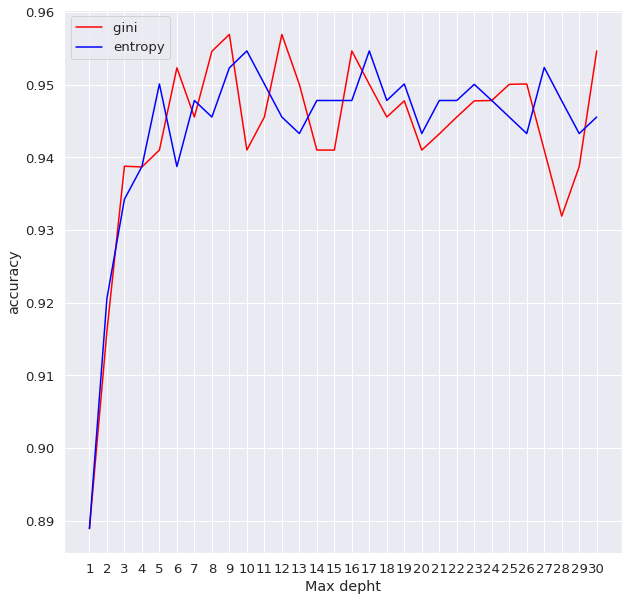

In [ ]:

plt.figure(figsize = (10 , 10))
acc_gini = []
acc_entropy = []
max_depth = []

for i in range(1  ,31):
    dtree = DecisionTreeClassifier(criterion = 'gini' , max_depth = i)
    cross = cross_validate(dtree , X_train , y_train , cv = 10 , scoring = 'accuracy')
    
    acc_gini.append(cross['test_score'].mean())



    dtree1 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = i)
    cross1 = cross_validate(dtree , X_train , y_train , cv = 10 , scoring = 'accuracy')
    
    acc_entropy.append(cross1['test_score'].mean())

    max_depth.append(i)


d = pd.DataFrame({"acc_gini" : pd.Series(acc_gini) , 
                  'acc_entropy' : pd.Series(acc_entropy) , 
                   'max_depth' : pd.Series(max_depth)})

plt.plot('max_depth' , 'acc_gini' , data =  d , color = 'red' , label = 'gini ')
plt.plot('max_depth' , 'acc_entropy' , data =  d , color = 'blue' , label = 'entropy')

plt.xlabel('Max depht')
plt.ylabel('accuracy')
plt.xticks([i for i in range(1 , 31)])
plt.legend()
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth = 6, criterion = 'gini')





In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomForestClassifier()
#weights = np.linspace(0.05 , 0.95 , 20)

model_cv =  RandomizedSearchCV(random ,  param_distributions = { 'n_estimators' :range(100 , 500 , 100) , 'max_depth' : range(2,8,1) ,
                                                               'max_features' : range(4,15,1) , 'min_samples_split':range(6,10,1), 
                                                                'min_samples_leaf': range(5 , 15 , 2)
                                                                } ,
                               n_iter = 100 ,
                               n_jobs = -1 , random_state = 42 , 
                               return_train_score =True , cv = 8)

model_cv.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:
model_cv.fit(X_train , y_train )

RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 8),
                                        'max_features': range(4, 15),
                                        'min_samples_leaf': range(5, 15, 2),
                                        'min_samples_split': range(6, 10),
                                        'n_estimators': range(100, 500, 100)},
                   random_state=42, return_train_score=True)

In [ ]:
print(f'the best estimator is : {model_cv.best_estimator_}')

the best estimator is : RandomForestClassifier(max_depth=6, max_features=13, min_samples_leaf=5,
                       min_samples_split=8)


In [ ]:
print(f'the best params is : {model_cv.best_params_}')

the best params is : {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 13, 'max_depth': 6}


In [ ]:
for i in range(0 , 100):


    print(f" {model_cv.cv_results_['params'][i]} has test score of :  {model_cv.cv_results_['mean_test_score'][i]}")


 {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 2} has test score of :  0.9365665584415583
 {'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_features': 12, 'max_depth': 3} has test score of :  0.9502029220779221
 {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 13, 'max_features': 10, 'max_depth': 2} has test score of :  0.9275162337662337
 {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 7} has test score of :  0.9592938311688312
 {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 9, 'max_depth': 6} has test score of :  0.9547077922077922
 {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 13, 'max_features': 10, 'max_depth': 4} has test score of :  0.9343344155844155
 {'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 13, 'max_depth': 5} has test score of

In [ ]:
random =RandomForestClassifier(**{'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 4})


In [ ]:
tree.fit(X_train , y_train)

random.fit(X_train , y_train)

RandomForestClassifier(max_depth=4, max_features=7, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=300)

# **predict the test set result**

**decision tree**

In [ ]:
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0])

**random forest**

In [ ]:
y_pred_random = random.predict(X_test)
y_pred_tree

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0])

# **validation**

**confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

#decision tree
print(f'decision tree : \n',confusion_matrix(y_pred_tree , y_test ))
print()
#random forest
print(f'random forest : \n' , confusion_matrix(y_pred_random , y_test))

decision tree : 
 [[101   6]
 [ 10  21]]

random forest : 
 [[106   2]
 [  5  25]]


**Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

#decision tree
print(f'decision tree : \n',accuracy_score(y_pred_tree , y_test ))
print()
#random forest
print(f'random forest : \n' , accuracy_score(y_pred_random , y_test))

decision tree : 
 0.8840579710144928

random forest : 
 0.9492753623188406


**Precision**

In [ ]:
from sklearn.metrics import precision_score

#decision tree
print(f'decision tree : \n',precision_score(y_pred_tree , y_test ))
print()
#random forest
print(f'random forest : \n' , precision_score(y_pred_random , y_test))

decision tree : 
 0.7777777777777778

random forest : 
 0.9259259259259259


**recall**

In [ ]:
from sklearn.metrics import recall_score

#decision tree
print(f'decision tree : \n',recall_score(y_pred_tree , y_test ))
print()
#random forest
print(f'random forest : \n' , recall_score(y_pred_random , y_test))

decision tree : 
 0.6774193548387096

random forest : 
 0.8333333333333334


**f1 score**

In [ ]:
from sklearn.metrics import f1_score

#decision tree
print(f'decision tree : \n',f1_score(y_pred_tree , y_test ))
print()
#random forest
print(f'random forest : \n' , f1_score(y_pred_random , y_test))

decision tree : 
 0.7241379310344828

random forest : 
 0.8771929824561403


In [ ]:
y_pred_train_tree = tree.predict(X_train)

y_pred_train_random = random.predict(X_train)

print(f'accuraccy on train set for decision tree : \n', accuracy_score(y_pred_train_tree , y_train))
print(f'accuraccy on train set for random forest : \n', accuracy_score(y_pred_train_random , y_train))


y_pred_val_tree = tree.predict(X_val)
y_pred_val_random = random.predict(X_val)

print(f'accuraccy on val set for decision tree : \n', accuracy_score(y_pred_val_tree , y_val))
print(f'accuraccy on val set for random forest : \n', accuracy_score(y_pred_val_random , y_val))

accuraccy on train set for decision tree : 
 0.9954648526077098
accuraccy on train set for random forest : 
 0.9773242630385488
accuraccy on val set for decision tree : 
 0.9795918367346939
accuraccy on val set for random forest : 
 0.9795918367346939
